## Election Forecasting Revisited

In the recitation from Unit 3, we used logistic regression on polling data in order to construct US presidential election predictions. We separated our data into a training set, containing data from 2004 and 2008 polls, and a test set, containing the data from 2012 polls. We then proceeded to develop a logistic regression model to forecast the 2012 US presidential election.

In this homework problem, we'll revisit our logistic regression model from Unit 3, and learn how to plot the output on a map of the United States. Unlike what we did in the Crime lecture, this time we'll be plotting predictions rather than data!

First, load the ggplot2, maps, and ggmap packages using the library function. All three packages should be installed on your computer from lecture, but if not, you may need to install them too using the install.packages function.

Then, load the US map and save it to the variable statesMap, like we did during the Crime lecture:
```R
statesMap = map_data("state")
```
The maps package contains other built-in maps, including a US county map, a world map, and maps for France and Italy.

In [1]:
library("ggplot2")
library("maps")
library("ggmap")

Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.

Please cite ggmap if you use it! See citation("ggmap") for details.



### Drawing a Map of the US

In [2]:
statesMap = map_data("state")

In [3]:
str(statesMap)

'data.frame':	15537 obs. of  6 variables:
 $ long     : num  -87.5 -87.5 -87.5 -87.5 -87.6 ...
 $ lat      : num  30.4 30.4 30.4 30.3 30.3 ...
 $ group    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ order    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ region   : chr  "alabama" "alabama" "alabama" "alabama" ...
 $ subregion: chr  NA NA NA NA ...


In [4]:
table(statesMap$group)


   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
 202  149  312  516   79   91   94   10  872  381  233  329  257  256  113  397 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
 650  399  566   36  220   30  460  370  373  382  315  238  208   70  125  205 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
  78   16  290   21  168   37  733   12  105  238  284  236  172   66  304  166 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63 
 289 1088   59  129   96   15  623   17   17   19   44  448  373  388   68 

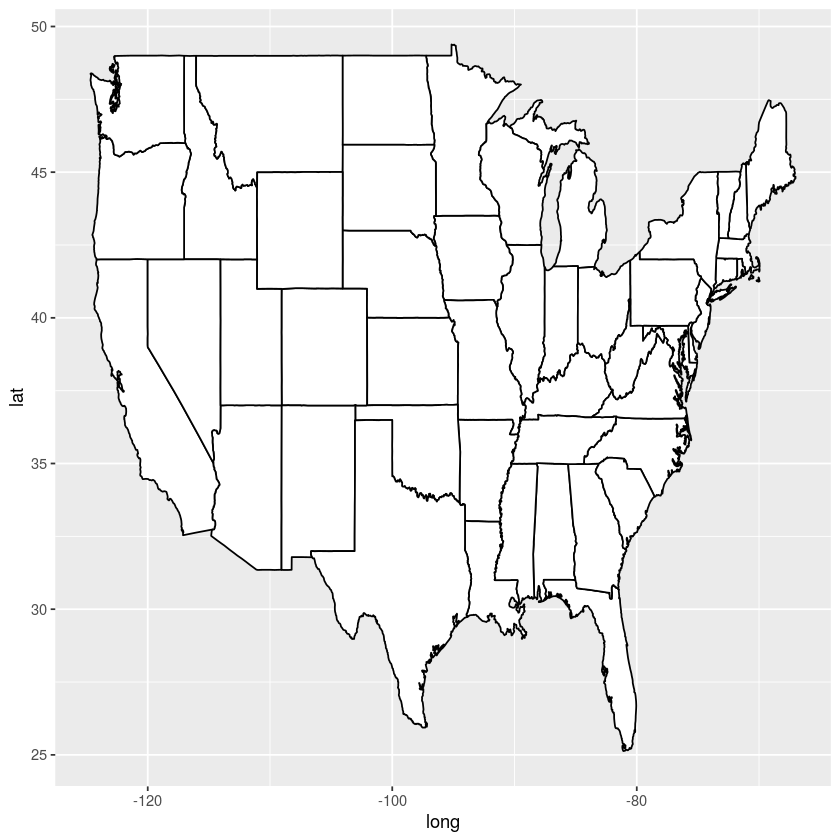

In [5]:
ggplot(statesMap, aes(x = long, y = lat, group = group)) + geom_polygon(fill = "white", color = "black")

### Coloring the States by Predictions

Now, let's color the map of the US according to our 2012 US presidential election predictions from the Unit 3 Recitation. We'll rebuild the model here, using the dataset PollingImputed.csv. Be sure to use this file so that you don't have to redo the imputation to fill in the missing values, like we did in the Unit 3 Recitation.

Load the data using the read.csv function, and call it "polling". Then split the data using the subset function into a training set called "Train" that has observations from 2004 and 2008, and a testing set called "Test" that has observations from 2012.

Note that we only have 45 states in our testing set, since we are missing observations for Alaska, Delaware, Alabama, Wyoming, and Vermont, so these states will not appear colored in our map.

Then, create a logistic regression model and make predictions on the test set using the following commands:
```R
mod2 = glm(Republican~SurveyUSA+DiffCount, data=Train, family="binomial")

TestPrediction = predict(mod2, newdata=Test, type="response")
```
TestPrediction gives the predicted probabilities for each state, but let's also create a vector of Republican/Democrat predictions by using the following command:
```R
TestPredictionBinary = as.numeric(TestPrediction > 0.5)
```
Now, put the predictions and state labels in a data.frame so that we can use ggplot:
```R
predictionDataFrame = data.frame(TestPrediction, TestPredictionBinary, Test$State)
```

In [6]:
polling = read.csv("./dataset/PollingImputed.csv")

In [7]:
str(polling)

'data.frame':	145 obs. of  7 variables:
 $ State     : Factor w/ 50 levels "Alabama","Alaska",..: 1 1 2 2 3 3 3 4 4 4 ...
 $ Year      : int  2004 2008 2004 2008 2004 2008 2012 2004 2008 2012 ...
 $ Rasmussen : int  11 21 19 16 5 5 8 7 10 13 ...
 $ SurveyUSA : int  18 25 21 18 15 3 5 5 7 21 ...
 $ DiffCount : int  5 5 1 6 8 9 4 8 5 2 ...
 $ PropR     : num  1 1 1 1 1 ...
 $ Republican: int  1 1 1 1 1 1 1 1 1 1 ...


In [8]:
Train = subset(polling, Year >= 2004 & Year <= 2008)
Test = subset(polling, Year == 2012)

In [9]:
nrow(Train)
nrow(Test)

[1] 100

[1] 45

In [10]:
mod2 = glm(Republican ~ SurveyUSA + DiffCount, data=Train, family="binomial")

In [11]:
summary(mod2)


Call:
glm(formula = Republican ~ SurveyUSA + DiffCount, family = "binomial", 
    data = Train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.04741  -0.00977   0.00561   0.03751   1.32999  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -0.6827     1.0468  -0.652   0.5143  
SurveyUSA     0.3309     0.2226   1.487   0.1371  
DiffCount     0.6619     0.3663   1.807   0.0708 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 138.269  on 99  degrees of freedom
Residual deviance:  11.154  on 97  degrees of freedom
AIC: 17.154

Number of Fisher Scoring iterations: 9


In [12]:
TestPrediction = predict(mod2, newdata=Test, type="response")

In [13]:
TestPredictionBinary = as.numeric(TestPrediction > 0.5)

In [14]:
predictionDataFrame = data.frame(TestPrediction, TestPredictionBinary, Test$State)

In [15]:
mean(predictionDataFrame$TestPrediction)

[1] 0.4852626

In [16]:
nrow(subset(predictionDataFrame, TestPredictionBinary == 1))

[1] 22

Now, we need to merge "predictionDataFrame" with the map data "statesMap", like we did in lecture. Before doing so, we need to convert the Test.State variable to lowercase, so that it matches the region variable in statesMap. Do this by typing the following in your R console:
```R
predictionDataFrame$region = tolower(predictionDataFrame$Test.State)
```
Now, merge the two data frames using the following command:
```R
predictionMap = merge(statesMap, predictionDataFrame, by = "region")
```
Lastly, we need to make sure the observations are in order so that the map is drawn properly, by typing the following:
```R
predictionMap = predictionMap[order(predictionMap$order),]
```

In [17]:
predictionDataFrame$region = tolower(predictionDataFrame$Test.State)
predictionMap = merge(statesMap, predictionDataFrame, by = "region")
predictionMap = predictionMap[order(predictionMap$order),]

In [18]:
str(predictionMap)

'data.frame':	15034 obs. of  9 variables:
 $ region              : chr  "arizona" "arizona" "arizona" "arizona" ...
 $ long                : num  -115 -115 -115 -115 -115 ...
 $ lat                 : num  35 35.1 35.1 35.2 35.2 ...
 $ group               : num  2 2 2 2 2 2 2 2 2 2 ...
 $ order               : int  204 205 206 207 208 209 210 211 212 213 ...
 $ subregion           : chr  NA NA NA NA ...
 $ TestPrediction      : num  0.974 0.974 0.974 0.974 0.974 ...
 $ TestPredictionBinary: num  1 1 1 1 1 1 1 1 1 1 ...
 $ Test.State          : Factor w/ 50 levels "Alabama","Alaska",..: 3 3 3 3 3 3 3 3 3 3 ...


In [19]:
str(statesMap)

'data.frame':	15537 obs. of  6 variables:
 $ long     : num  -87.5 -87.5 -87.5 -87.5 -87.6 ...
 $ lat      : num  30.4 30.4 30.4 30.3 30.3 ...
 $ group    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ order    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ region   : chr  "alabama" "alabama" "alabama" "alabama" ...
 $ subregion: chr  NA NA NA NA ...


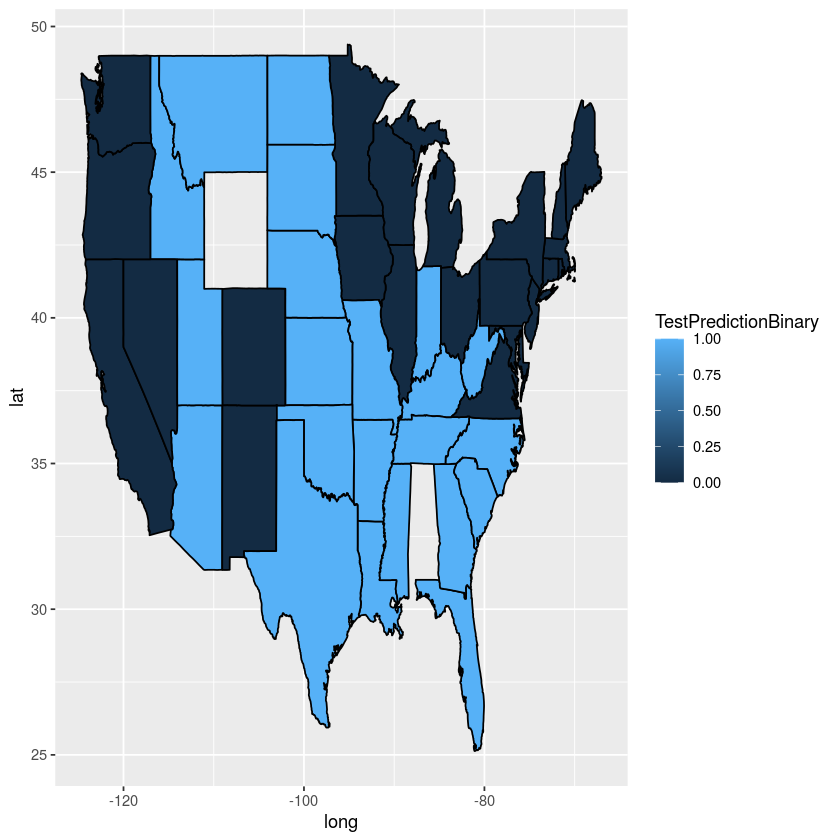

In [20]:
ggplot(predictionMap, aes(x = long, y = lat, group = group, fill = TestPredictionBinary)) + 
geom_polygon(color = "black")

We see that the legend displays a blue gradient for outcomes between 0 and 1. However, when plotting the binary predictions there are only two possible outcomes: 0 or 1. Let's replot the map with discrete outcomes. We can also change the color scheme to blue and red, to match the blue color associated with the Democratic Party in the US and the red color associated with the Republican Party in the US. This can be done with the following command:
```R
ggplot(predictionMap, aes(x = long, y = lat, group = group, fill = TestPredictionBinary))+ geom_polygon(color = "black") + scale_fill_gradient(low = "blue", high = "red", guide = "legend", breaks= c(0,1), labels = c("Democrat", "Republican"), name = "Prediction 2012")
```
Alternatively, we could plot the probabilities instead of the binary predictions. Change the plot command above to instead color the states by the variable TestPrediction. You should see a gradient of colors ranging from red to blue. Do the colors of the states in the map for TestPrediction look different from the colors of the states in the map with TestPredictionBinary? Why or why not?

NOTE: If you have a hard time seeing the red/blue gradient, feel free to change the color scheme, by changing the arguments low = "blue" and high = "red" to colors of your choice (to see all of the color options in R, type colors() in your R console). You can even change it to a gray scale, by changing the low and high colors to "gray" and "black".

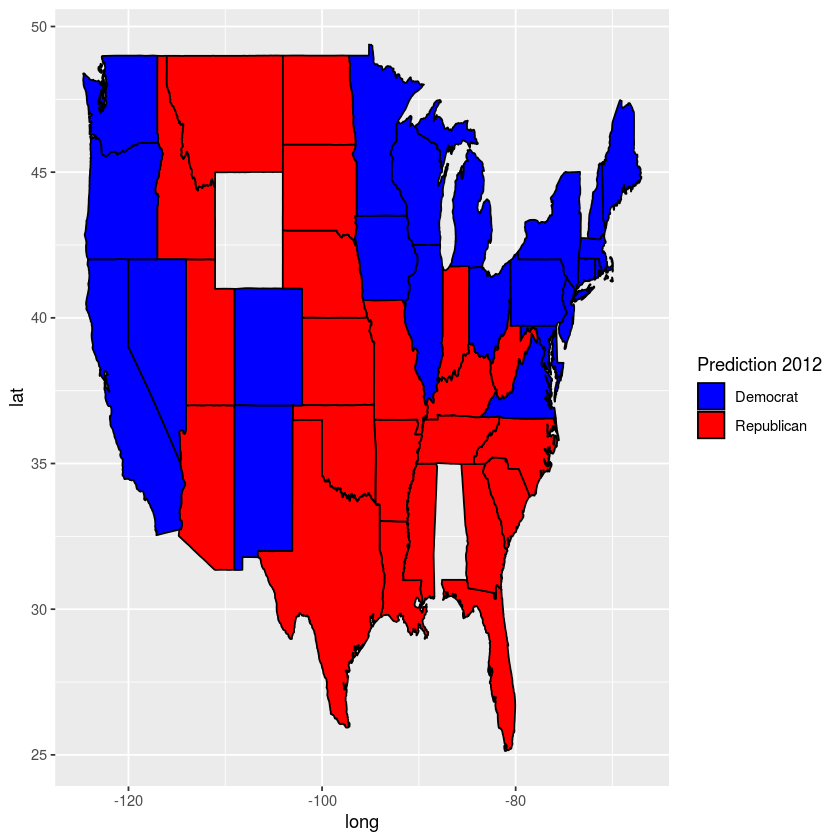

In [21]:
ggplot(predictionMap, aes(x = long, y = lat, group = group, fill = TestPredictionBinary)) +
geom_polygon(color = "black") + 
scale_fill_gradient(low = "blue", high = "red", guide = "legend", breaks= c(0,1), labels = c("Democrat", "Republican"), name = "Prediction 2012")

### Understanding the Predictions

In [22]:
florida = subset(predictionMap, region == 'florida')

In [23]:
florida

,region,long,lat,group,order,subregion,TestPrediction,TestPredictionBinary,Test.State
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<fct>
1150,florida,-85.01548,30.99702,9,1462,NA,0.9640395,1,Florida
1151,florida,-84.99829,30.96264,9,1463,NA,0.9640395,1,Florida
1148,florida,-84.97537,30.92253,9,1464,NA,0.9640395,1,Florida
1158,florida,-84.94672,30.89962,9,1465,NA,0.9640395,1,Florida
1159,florida,-84.94099,30.88815,9,1466,NA,0.9640395,1,Florida
1156,florida,-84.94672,30.85951,9,1467,NA,0.9640395,1,Florida
1157,florida,-84.94099,30.78502,9,1468,NA,0.9640395,1,Florida
1172,florida,-84.90662,30.74492,9,1469,NA,0.9640395,1,Florida
1160,florida,-84.87797,30.72773,9,1470,NA,0.9640395,1,Florida


### Parameter Settings

In this part, we'll explore what the different parameter settings of geom_polygon do. Throughout the problem, use the help page for geom_polygon, which can be accessed by ?geom_polygon. To see more information about a certain parameter, just type a question mark and then the parameter name to get the help page for that parameter. Experiment with different parameter settings to try and replicate the plots!

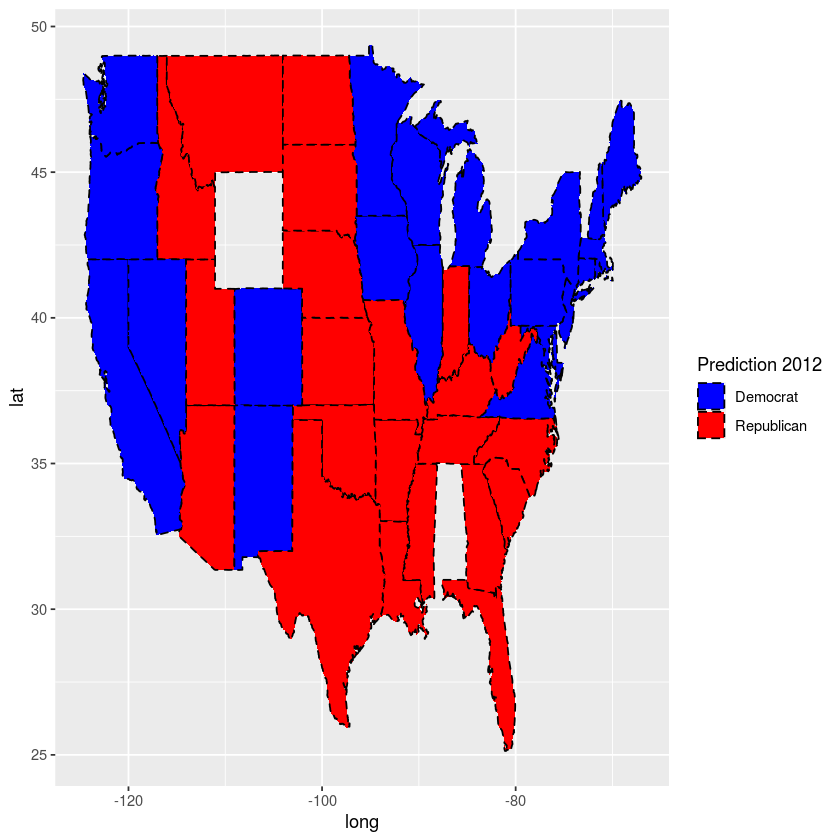

In [26]:
ggplot(predictionMap, aes(x = long, y = lat, group = group, fill = TestPredictionBinary)) +
geom_polygon(color = "black", linetype='dashed') + 
scale_fill_gradient(low = "blue", high = "red", guide = "legend", breaks= c(0,1), labels = c("Democrat", "Republican"), name = "Prediction 2012")

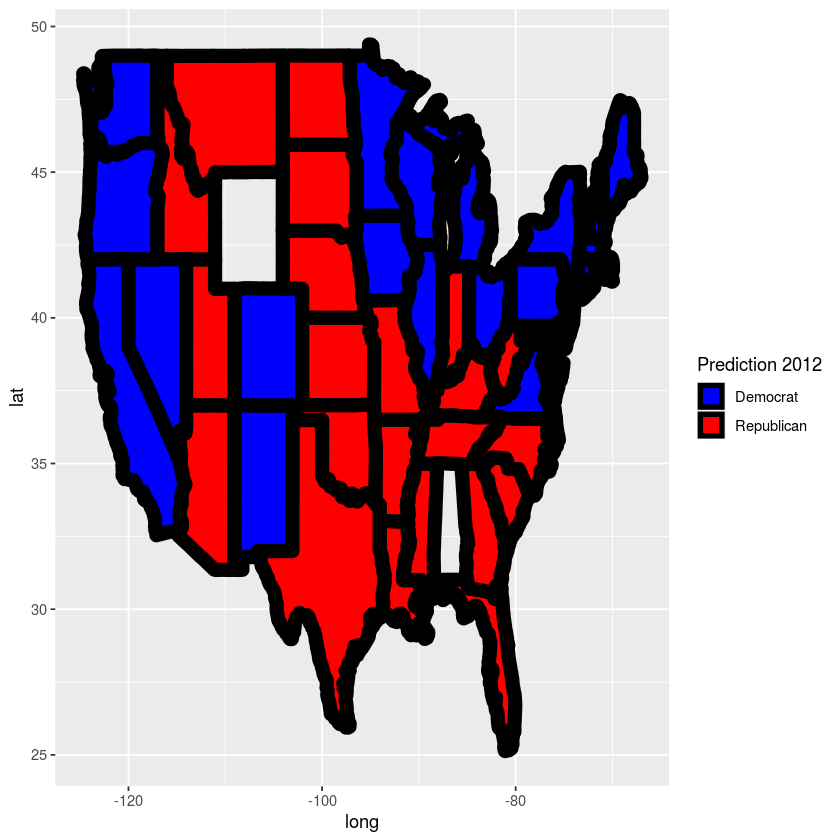

In [30]:
ggplot(predictionMap, aes(x = long, y = lat, group = group, fill = TestPredictionBinary)) +
geom_polygon(color = "black", size=4) + 
scale_fill_gradient(low = "blue", high = "red", guide = "legend", breaks= c(0,1), labels = c("Democrat", "Republican"), name = "Prediction 2012")